<a href="https://colab.research.google.com/github/linneverh/Sust-Finance/blob/main/assignment_1__Q1_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Allocation based on Financial Performance

In [49]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
#import dataset from git
url_DS_ESGScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_ESGScore_Y.csv'
DS_ESGScore_Y = pd.read_csv(url_DS_ESGScore_Y)

url_DS_EScore_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_EScore_Y.csv'
DS_EScore_Y = pd.read_csv(url_DS_EScore_Y)

url_DS_MV_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_M.csv'
DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)

url_DS_MV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_MV_USD_Y.csv'
DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)

url_DS_REV_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_REV_USD_Y.csv'
DS_REV_USD_Y = pd.read_csv(url_DS_REV_USD_Y)

url_DS_RI_USD_M = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_M.csv'
DS_RI_USD_M = pd.read_csv(url_DS_RI_USD_M)

url_DS_RI_USD_Y = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/DS_RI_USD_Y.csv'
DS_RI_USD_Y = pd.read_csv(url_DS_RI_USD_M)

url_Risk_Free_Rate = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Risk_Free_Rate.csv'
Risk_Free_Rate = pd.read_csv(url_Risk_Free_Rate)

url_Static = 'https://raw.githubusercontent.com/linneverh/Sust-Finance/refs/heads/main/Static.csv'
Static = pd.read_csv(url_Static)


<ipython-input-50-c9f8fe89ee9e>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_M = pd.read_csv(url_DS_MV_USD_M)
<ipython-input-50-c9f8fe89ee9e>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  DS_MV_USD_Y = pd.read_csv(url_DS_MV_USD_M)


### Test data sets

In [51]:
DS_ESGScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,45.63,38.22,28.43,28.74,44.83,...,57.07,55.50,69.43,68.12,71.38,71.32,71.02,77.28,76.14,74.04
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.39,10.77,13.69,13.88,15.60,14.29,28.84
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42.63,61.57,76.33,77.40,72.25,83.24,80.37,81.20
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,41.27,45.71,45.15,44.16,43.86,43.77,46.04,59.77
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.04,51.45,53.53,63.88,70.02,69.13,67.10,70.65,69.79,67.15


In [52]:
DS_EScore_Y.head()

,NAME,ISIN,1999,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,SCHLUMBERGER,AN8068571086,NaN,NaN,NaN,53.65,23.33,0.0,0.0,40.7,...,75.71,71.54,73.65,85.28,81.96,80.74,79.07,88.53,86.85,82.05
1,ALUAR,ARALUA010258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15.82,13.26,12.26,11.05,13.19,12.21,17.65
2,BANCO BBVA ARGENTINA,ARP125991090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.51,56.64,76.16,84.68,82.48,88.36,86.99,79.68
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.51,33.47,33.72,33.41,33.52,38.37,36.83,48.05
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.69,55.55,56.98,58.90,64.85,62.56,59.32,59.27,65.77,59.45


In [53]:
DS_MV_USD_M.head()

,NAME,ISIN,1999-12-31 00:00:00,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-28 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,2025-01-31 00:00:00
0,SCHLUMBERGER,AN8068571086,30859.99,33574.85,40611.13,43352.43,43387.86,41861.39,42466.02,42074.79,...,67864.94,65592.31,67436.13,68571.81,62465.84,59239.83,56585.01,62050.05,53708.59,54774.95
1,ALUAR,ARALUA010258,1129.31,1328.64,1395.07,1362.23,1340.19,1317.78,1209.89,1395.69,...,2698.60,3165.16,3033.34,2875.18,2694.70,2494.63,2381.96,2635.60,2425.22,2291.70
2,BANCO BBVA ARGENTINA,ARP125991090,1656.3,1570.39,1851.34,1656.82,1388.70,1352.22,1541.05,1551.54,...,2435.11,3210.54,2818.34,2409.49,2832.34,2697.85,3274.73,3745.74,4516.58,5131.45
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1414.37,1407.47,1463.08,1460.01,1356.04,893.05,955.70,990.45,...,4340.63,5146.56,4829.15,4589.92,3971.89,3870.75,3641.89,4278.73,3903.71,3645.50
4,STRABAG SE,AT000000STR1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5043.53,5210.65,4935.22,4950.74,5129.83,4947.90,4652.68,4819.74,4835.47,5800.59


## Question 1: Average annualized return and volatiliy (10 points)

Compute the annualized average return and annualized volatility for all individual assets over the period 2014–2024 based on monthly data. Plot and comment the histogram of these distributions. Compute and comment on the correlation between individual average returns and volatilities in the cross section. (10 points)


In [54]:
#CLEANING/MERGING

# Merging the data to filter per region
merged_DS_RI_USD_M = pd.merge(DS_RI_USD_M, Static, on='ISIN', how='inner')
merged_DS_RI_USD_M = merged_DS_RI_USD_M[['ISIN', 'Name', 'Country', 'Region'] + [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region']]]
del(merged_DS_RI_USD_M['NAME'])
merged_DS_RI_USD_M.head(10)


#Keeping only the columns between 31/12/13 and 31/12/24
start_date = pd.to_datetime('2013-12-31')
end_date = pd.to_datetime('2024-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_RI_USD_M = merged_DS_RI_USD_M[selected_columns]
merged_DS_RI_USD_M.head()


# Filter on EM countries
EM_merged_DS_RI_USD_M = merged_DS_RI_USD_M[merged_DS_RI_USD_M['Region'] == 'EM']
EM_merged_DS_RI_USD_M.head()



<ipython-input-54-e9b64cfafb0d>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_RI_USD_M.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,ISIN,Name,Country,Region,2013-12-31 00:00:00,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,2011.67,2056.70,1749.71,1716.83,1747.44,1791.65,...,5760.96,5331.65,6253.43,5993.00,5680.53,5323.94,4928.66,4706.05,5207.18,4802.89
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,294.72,283.66,287.78,322.01,373.34,403.18,...,412.77,458.42,672.82,624.64,569.69,669.66,637.87,774.26,885.63,1067.88
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,407.03,418.65,384.51,393.46,436.72,432.66,...,1182.67,1092.52,1295.37,1215.48,1155.27,999.71,974.26,916.65,1076.94,982.55
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,18.66,17.10,17.59,14.98,13.98,13.19,...,0.63,0.59,0.59,0.56,0.51,0.59,0.62,0.80,0.67,0.63
146,BRABEVACNOR1,AMBEV ON,BR,EM,2413.60,2216.92,2411.18,2506.51,2452.27,2377.43,...,1199.78,1127.14,1057.57,987.73,985.01,1091.85,1154.89,1049.92,1025.18,963.62


In [55]:
#RETURNS TABLE

#MONTHLY RETURNS TABLE
# idea: for annualized, sum up all months r and divide by the total number of months, multiply by 12
# for the other: annualized volatility, same thing with volatility

EM_merged_DS_R_USD_M = EM_merged_DS_RI_USD_M.copy()  # Create a copy to avoid modifying the original

# Get the date columns for calculations
date_columns = EM_merged_DS_RI_USD_M.columns[4:]  # Assuming the date columns start from index 6

# Iterate through the date columns and calculate simple returns
for i in range(len(date_columns)-1):
    current_date = date_columns[i]
    next_date = date_columns[i + 1]
    # Check if the current_date value is 0
    EM_merged_DS_R_USD_M[next_date] = np.where(EM_merged_DS_RI_USD_M[current_date] != 0,#CLEANING OF THE INFINITE VALUES

                                              (EM_merged_DS_RI_USD_M[next_date] - EM_merged_DS_RI_USD_M[current_date]) / EM_merged_DS_RI_USD_M[current_date],
                                              0)  # Set return rate to 0 if current_date is 0

# Drop the first date column as it won't have a calculated return
EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M.drop(columns=[date_columns[0]])

# Now EM_merged_DS_R_USD_M contains the simple returns
EM_merged_DS_R_USD_M.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-03-29 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,0.121748,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.322091,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,0.158254,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,-0.045455,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.014473,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048


In [56]:
#AVERAGE YEARLY RETURNS

# Calculate the mean of every data point for each company (row) across all columns
EM_merged_DS_R_USD_M['Annualized Average Return'] = EM_merged_DS_R_USD_M.iloc[:, 4:].mean(axis=1) * 12

# Display the updated DataFrame
EM_merged_DS_R_USD_M.head()

<ipython-input-56-a93334cdc4ac>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EM_merged_DS_R_USD_M['Annualized Average Return'] = EM_merged_DS_R_USD_M.iloc[:, 4:].mean(axis=1) * 12


,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,-0.074521,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.110594,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,-0.076226,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,-0.063492,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.060544,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432


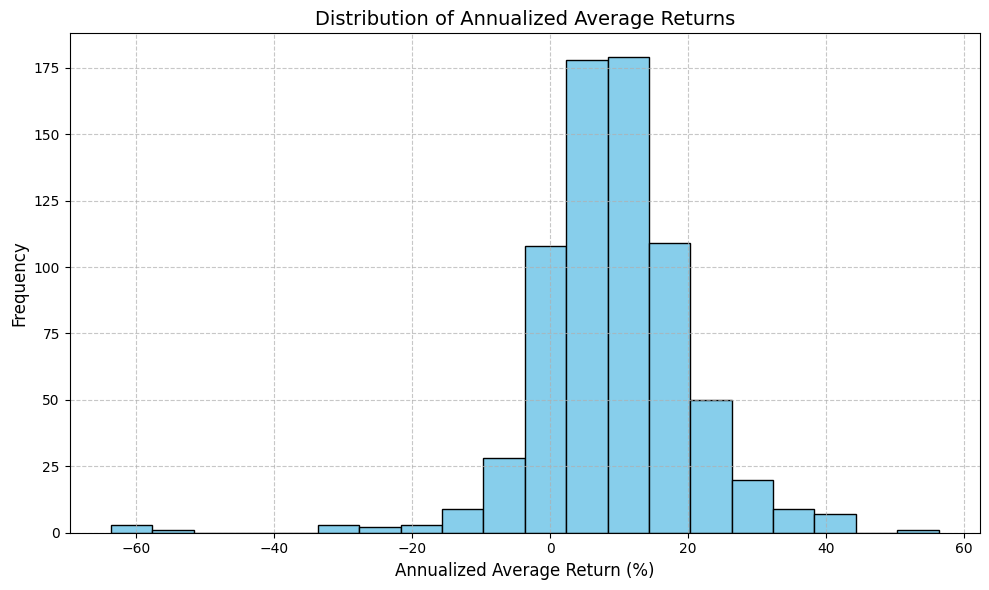

In [57]:
#HISTOGRAM AAR

# Drop rows with NaN values in 'Annualized Average Return'
EM_merged_DS_R_USD_M = EM_merged_DS_R_USD_M.dropna(subset=['Annualized Average Return'])

plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.hist(EM_merged_DS_R_USD_M['Annualized Average Return'] * 100, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Annualized Average Return (%)', fontsize=12)  # Increase font size
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Annualized Average Returns', fontsize=14)  # Increase font size
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [58]:
#VOLATILITY

T=120

# Calculate volatility for each asset
volatilities = []
for i in range(EM_merged_DS_R_USD_M.shape[0]): # Iterate using numerical index
    R_p_t = EM_merged_DS_R_USD_M.iloc[i, 4:].values  # Returns for the asset
    mu_p = np.mean(R_p_t)  # Mean return for the asset
    sigma = np.sqrt((1 / T) * np.sum((R_p_t - mu_p) ** 2))  # Volatility calculation
    volatilities.append(sigma)

# Add the volatility column to the DataFrame
EM_merged_DS_R_USD_M['Volatility'] = volatilities
EM_merged_DS_R_USD_M.head()

,ISIN,Name,Country,Region,2014-01-31 00:00:00,2014-02-28 00:00:00,2014-03-31 00:00:00,2014-04-30 00:00:00,2014-05-30 00:00:00,2014-06-30 00:00:00,...,2024-05-31 00:00:00,2024-06-28 00:00:00,2024-07-31 00:00:00,2024-08-30 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-29 00:00:00,2024-12-31 00:00:00,Annualized Average Return,Volatility
1,ARALUA010258,ALUAR,AR,EM,0.022384,-0.149263,-0.018792,0.017829,0.025300,-0.020969,...,0.172888,-0.041646,-0.052139,-0.062774,-0.074246,-0.045166,0.106486,-0.077641,0.232388,0.172436
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM,-0.037527,0.014524,0.118945,0.159405,0.079927,0.128727,...,0.467693,-0.071609,-0.087971,0.175481,-0.047472,0.213821,0.143841,0.205786,0.343283,0.198981
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM,0.028548,-0.081548,0.023276,0.109948,-0.009297,-0.058221,...,0.185672,-0.061673,-0.049536,-0.134653,-0.025457,-0.059132,0.174865,-0.087646,0.237229,0.169678
118,BMG211591018,CHINA YURUN FOOD GROUP,CN,EM,-0.083601,0.028655,-0.148380,-0.066756,-0.056509,-0.019712,...,0.000000,-0.050847,-0.089286,0.156863,0.050847,0.290323,-0.162500,-0.059701,-0.139865,0.187857
146,BRABEVACNOR1,AMBEV ON,BR,EM,-0.081488,0.087626,0.039537,-0.021640,-0.030519,0.011256,...,-0.061723,-0.066038,-0.002754,0.108466,0.057737,-0.090892,-0.023564,-0.060048,-0.036432,0.092097


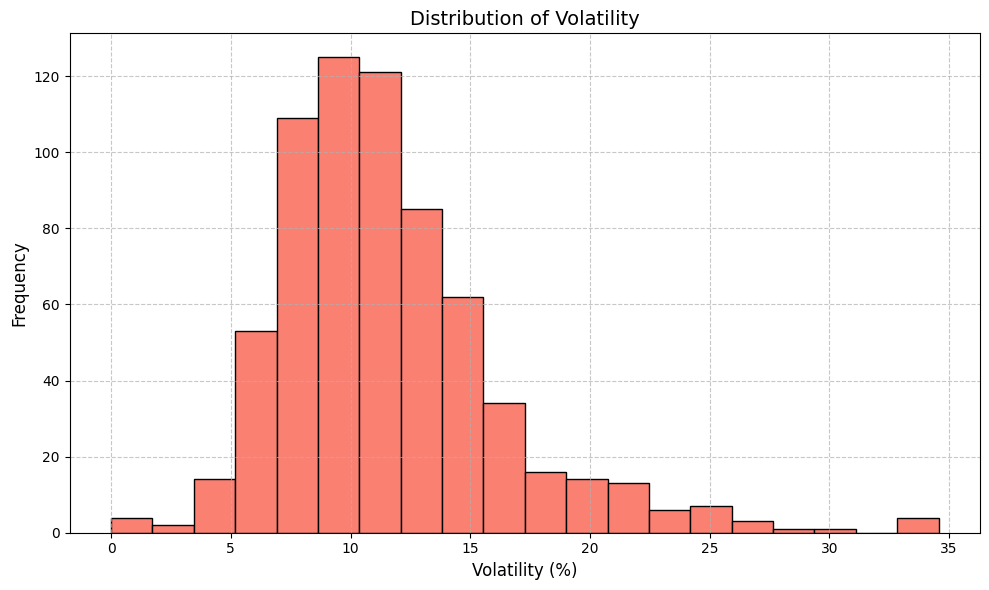

In [59]:
#HISTOGRAM FOR VOLATILITY

plt.figure(figsize=(10, 6))
plt.hist(EM_merged_DS_R_USD_M['Volatility'] * 100, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Volatility (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between Annualized Average Return and Volatility: 0.056183772253159334


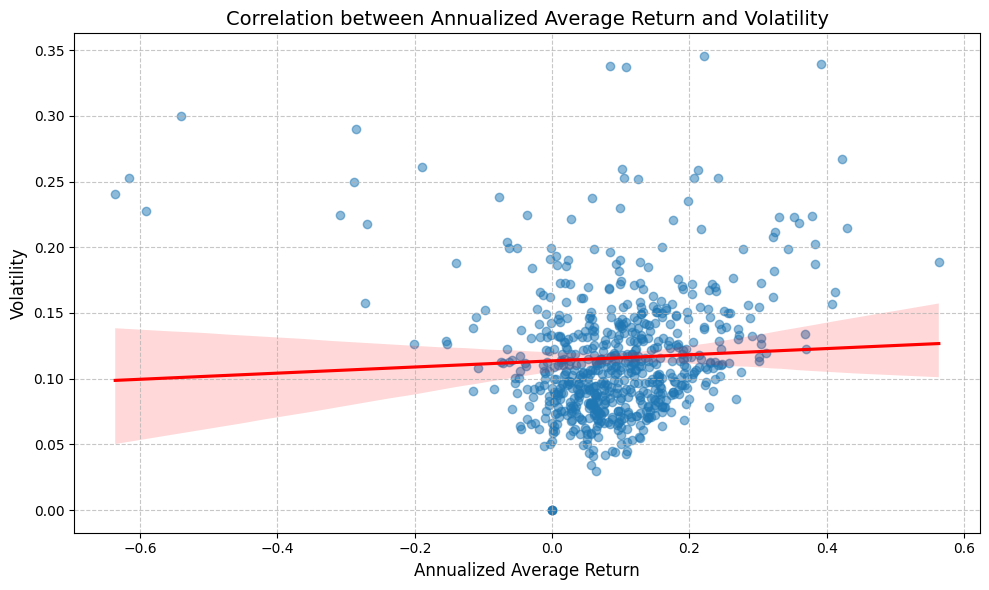

In [60]:
#CORRELATION AAR AND VOLATILITY

# Calculate the correlation
correlation = EM_merged_DS_R_USD_M['Annualized Average Return'].corr(EM_merged_DS_R_USD_M['Volatility'])

# Print the correlation
print(f"Correlation between Annualized Average Return and Volatility: {correlation}")

# Create a scatter plot with a correlation line using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='Annualized Average Return', y='Volatility', data=EM_merged_DS_R_USD_M,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})  # Add correlation line
plt.xlabel('Annualized Average Return', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.title('Correlation between Annualized Average Return and Volatility', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Question 2: Equally-weighted/market-cap (value) weighted portfolios (15 points)

## Question 3: Efficient frontier (35 points)

## Question 4: Minimum variance portfolio (40 points)

In [76]:
#MEEEEEERGE

# Merging the data to filter per region
merged_DS_EScore_Y = pd.merge(DS_EScore_Y, Static, on='ISIN', how='inner')
merged_DS_EScore_Y = merged_DS_EScore_Y[['ISIN', 'Name', 'Region'] + [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Region', 'NAME']]]
merged_DS_EScore_Y.head()

#Keeping only the columns between 31/12/03 and 31/12/23
start_date = pd.to_datetime('2002-12-31')
end_date = pd.to_datetime('2023-12-31')

# Filter columns excluding non-date columns
date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]
selected_columns = ['ISIN', 'Name', 'Country', 'Region'] + date_columns
merged_DS_EScore_Y = merged_DS_EScore_Y[selected_columns]
merged_DS_EScore_Y.head()

# Filter on EM countries
EM_merged_DS_EScore_Y = merged_DS_EScore_Y[merged_DS_EScore_Y['Region'] == 'EM']

#REPLACING NaN values (old version)
# Replace NaN values with row means for numerical columns
#numerical_cols = EM_merged_DS_EScore_Y.select_dtypes(include=np.number).columns
#EM_merged_DS_EScore_Y[numerical_cols] = EM_merged_DS_EScore_Y[numerical_cols].apply(lambda row: row.fillna(row.mean()), axis=1)
#EM_merged_DS_EScore_Y['SampleMean'] = EM_merged_DS_EScore_Y[numerical_cols].mean(axis=1)
#EM_merged_DS_EScore_Y.head()


#REPLACING NaN values between 2003 and 2013, following the "sample average" rule from slide 9 of the class

# Select columns for the 2003-2013 sample
sample_columns = [col for col in EM_merged_DS_EScore_Y.columns if '2003' in col or '2004' in col or '2005' in col or '2006' in col or '2007' in col or '2008' in col or '2009' in col or '2010' in col or '2011' in col or '2012' in col or '2013' in col]
sample_data = EM_merged_DS_EScore_Y[['ISIN', 'Name'] + sample_columns]

# Function to handle missing values in a row
def handle_missing_values(row):
    # Convert values to numeric, handling errors
    values = pd.to_numeric(row[sample_columns], errors='coerce').values
    nan_indices = np.where(np.isnan(values))[0]

    if len(nan_indices) == 0:  # No missing values
        return row

    # Check for continuous NaN periods at the beginning or end
    if nan_indices[0] == 0 or nan_indices[-1] == len(values) - 1:
        # Replace continuous NaNs with average of available values
        available_values = values[~np.isnan(values)]
        if len(available_values) > 0:
            row[sample_columns] = np.where(np.isnan(values), np.mean(available_values), values)
            return row
        else:
            return None  # Remove row if no available values for averaging
    # Check for isolated NaNs
    else:
        for i in nan_indices:
            if i > 0 and i < len(values) - 1:
                # Replace isolated NaNs with average of previous and next values
                row[sample_columns[i]] = np.mean([values[i - 1], values[i + 1]])
        return row

    return None  # Remove row if none of the above conditions are met

# Apply the function to each row and remove rows that returned None
sample_data = sample_data.apply(handle_missing_values, axis=1).dropna()
sample_data.head()
#EM_merged_DS_EScore_Y.head()


<ipython-input-76-f7671b92caff>:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = [col for col in merged_DS_EScore_Y.columns if col not in ['ISIN', 'Name', 'Country', 'Region'] and start_date <= pd.to_datetime(col, errors='ignore') <= end_date]


,0
118,ISIN BMG211591018 Name CHINA Y...
145,ISIN BRABEVACNOR1 Name AMBEV ON 2003...
146,ISIN BRBBASACNOR3 Name BANCO DO BR...
147,ISIN BRBBDCACNPR8 Name BANCO BRADES...
148,ISIN BRBRFSACNOR8 Name BRF BRASIL...
